In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
df = pd.read_csv('instagrampost-labeling.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df = df.dropna()
df

,Steming,Label
0,ugm metaverse minecraft challenge hai sobat mi...,Positif
1,looking at the challenge or trouble not sure l...,Negatif
2,hello sobat online kenal fatmawati universitas...,Positif
3,msib mari ajar holaaa everyone tesalonika univ...,Positif
4,halo generasi muda indonesia kenal himmatuz za...,Positif
...,...,...
176,terima kasih sempat program studi independent ...,Positif
177,agustus kemerdakaan nkri identik riah raya mer...,Positif
178,hai magangers bingung studi independen galau p...,Positif
179,mt school parsial agenda upgrading trainer lea...,Positif


In [3]:
pd.value_counts(df['Label'])

C:\Users\Laurence Nicholas S\AppData\Local\Temp\ipykernel_17892\626637336.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Label'])


Label
Positif    165
Netral      12
Negatif      4
Name: count, dtype: int64

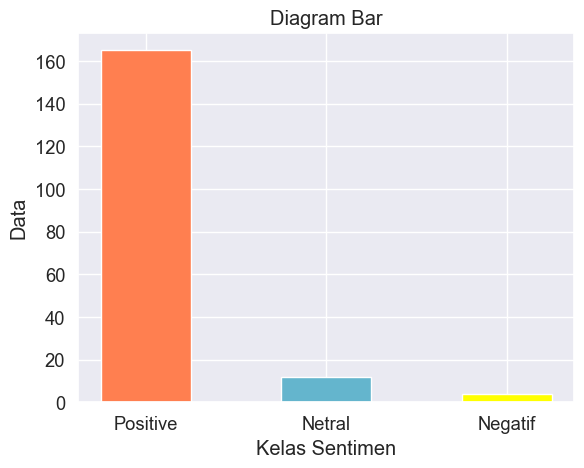

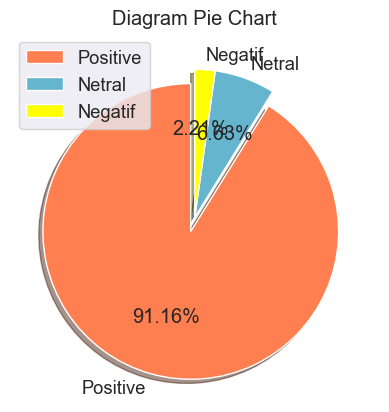

In [4]:
labels = ['Positive','Netral','Negatif']
Category2 = [165,12,4]
plt.bar(labels, Category2, tick_label=labels, width=0.5, color=['coral', 'c','yellow'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar')
plt.show()

#pie chart
color = ['coral', 'c','yellow']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0))
plt.title('Diagram Pie Chart')
plt.legend()
plt.show()

In [5]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Steming'], df['Label'], test_size = 0.5, random_state = 1)

In [6]:
# Membuat data frame dari hasil split
df_train50 = pd.DataFrame()
df_train50['Steming'] = train_X
df_train50['Label'] = train_Y

df_test50 = pd.DataFrame()
df_test50['Steming'] = test_X
df_test50['Label'] = test_Y

In [7]:
#Data frame train hasil pembagian
df_train50

,Steming,Label
55,ratap laman sembari senyum mikat tubuh bisik s...,Positif
163,such an honour for me to be learner at microso...,Positif
88,hallo rizka nur aulia prodi manajemen universi...,Netral
106,hallo fita dwiagustini arman jurus teknik sipi...,Positif
46,maribelajar microsoft studi independen halo ke...,Positif
...,...,...
133,hi eka salah mahasiswa jurus akuntansi ikut pr...,Positif
137,halo kenal fitri khumaeroh salah serta program...,Positif
72,hai sobat jitu terima sertifikat program kampu...,Positif
140,hello my name is muhammad zaynurroyhan im an i...,Positif


In [8]:
#Data Frame test Hasil Pembagian
df_test50

,Steming,Label
117,assalamualaikum halo jody irawan politeknik ma...,Positif
93,hallo samuel parlindungsn matematika universit...,Positif
113,hii hormat salah serta studi independen kampus...,Positif
162,cuplik video ikut program studi independen kam...,Netral
35,hallo hafiz serta studi independen learning tr...,Positif
...,...,...
89,hallo annisa herawati manajemen didik universi...,Positif
0,ugm metaverse minecraft challenge hai sobat mi...,Positif
166,halo kezia abigail vania universitas sebelas m...,Positif
77,hallo erika anugra heni prodi didik matematika...,Positif


In [9]:
df_test50.to_csv('instagrampost-test50.csv')

In [10]:
df_train50.to_csv('instagrampost-train50.csv')

In [11]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_5050 = TfidfVectorizer()
tfidf_vect_5050.fit(df['Steming'])
train_X_tfidf_5050 = tfidf_vect_5050.transform(df_train50['Steming'])
test_X_tfidf_5050 = tfidf_vect_5050.transform(df_test50['Steming'])

In [12]:
#melihat hasil pembobotan TF-IDF pada data train
print(train_X_tfidf_5050)

  (0, 2315)	0.08747915097298331
  (0, 2300)	0.12527963866309577
  (0, 2295)	0.13522921714230526
  (0, 2273)	0.041014126034789045
  (0, 2210)	0.17982974518997935
  (0, 2174)	0.13522921714230526
  (0, 2099)	0.029613141756017727
  (0, 2055)	0.10448806772737941
  (0, 2042)	0.13522921714230526
  (0, 2013)	0.11822030038790916
  (0, 1989)	0.04351173898498158
  (0, 1980)	0.13522921714230526
  (0, 1978)	0.13522921714230526
  (0, 1966)	0.13522921714230526
  (0, 1944)	0.13522921714230526
  (0, 1943)	0.13522921714230526
  (0, 1818)	0.08131222667509402
  (0, 1798)	0.13522921714230526
  (0, 1758)	0.13522921714230526
  (0, 1754)	0.10272543245981088
  (0, 1733)	0.03850800305161633
  (0, 1666)	0.10121138363351305
  (0, 1658)	0.1127446522210687
  (0, 1623)	0.12527963866309577
  (0, 1534)	0.08420246687911695
  :	:
  (88, 125)	0.27164003024090194
  (88, 113)	0.055570895794437906
  (88, 96)	0.1321116119755267
  (88, 5)	0.16971105975329062
  (89, 2450)	0.2462373890175351
  (89, 2403)	0.2462373890175351
  (8

In [13]:
#melihat hasil pembobotan TF-IDF pada data test
print(test_X_tfidf_5050)

  (0, 2463)	0.05727003596862937
  (0, 2401)	0.07869119295594132
  (0, 2334)	0.03569882678844954
  (0, 2331)	0.11393678786006188
  (0, 2328)	0.10555381385164335
  (0, 2280)	0.10555381385164335
  (0, 2273)	0.06911254647542714
  (0, 2236)	0.06012628838981173
  (0, 2211)	0.1660806644131347
  (0, 2196)	0.08456568849515116
  (0, 2189)	0.05727003596862937
  (0, 2188)	0.11393678786006188
  (0, 2168)	0.10555381385164335
  (0, 2159)	0.06012628838981173
  (0, 2114)	0.08803596632548885
  (0, 2099)	0.04990084719006774
  (0, 2056)	0.09122302512914608
  (0, 2029)	0.08284005112072754
  (0, 2003)	0.19921199827512923
  (0, 1989)	0.03666062614957853
  (0, 1988)	0.06344136591717965
  (0, 1971)	0.11393678786006188
  (0, 1958)	0.06633093818090326
  (0, 1942)	0.07869119295594132
  (0, 1893)	0.11393678786006188
  :	:
  (90, 2273)	0.17380011966789757
  (90, 2254)	0.20284331142992576
  (90, 2207)	0.2213876099600684
  (90, 2169)	0.17525480580752165
  (90, 2159)	0.1512020125181072
  (90, 2149)	0.16184971511104643

In [14]:
print(train_X_tfidf_5050.shape)
print(test_X_tfidf_5050.shape)

(90, 2497)
(91, 2497)


In [15]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_5050.vocabulary_)

{'ugm': 2317, 'metaverse': 1403, 'minecraft': 1415, 'challenge': 404, 'hai': 810, 'sobat': 2052, 'microsoft': 1405, 'rangka': 1794, 'dies': 535, 'natalis': 1487, 'selenggara': 1958, 'kompetisi': 1156, 'nama': 1481, 'giat': 768, 'ikut': 920, 'siswa': 2035, 'smasederajat': 2049, 'mahasiswa': 1308, 'guru': 799, 'syarat': 2139, 'tentu': 2205, 'gambar': 752, 'slide': 2047, 'iya': 1026, 'daftar': 475, 'karya': 1087, 'bitlyugmmetaverse': 330, 'ayo': 222, 'ajak': 55, 'temantemanmu': 2197, 'raih': 1785, 'hadiah': 807, 'total': 2272, 'rp': 1870, 'tunggu': 2302, 'looking': 1281, 'at': 203, 'the': 2224, 'or': 1564, 'trouble': 2288, 'not': 1524, 'sure': 2127, 'lets': 1253, 'gooo': 783, 'sedia': 1941, 'to': 2257, 'spend': 2074, 'all': 89, 'of': 1541, 'my': 1474, 'gabut': 744, 'day': 493, 'and': 125, 'time': 2250, 'fix': 709, 'this': 2236, 'see': 1942, 'hello': 853, 'online': 1555, 'kenal': 1116, 'fatmawati': 678, 'universitas': 2334, 'negeri': 1495, 'makassar': 1318, 'senang': 1974, 'studiproyek': 2

In [16]:
from sklearn.svm import SVC

#Menerapkan pemodelan SVM pada data train
model = SVC(kernel='linear',
            decision_function_shape='ovr',
           C=1.0)
clf = model.fit(train_X_tfidf_5050,train_Y)

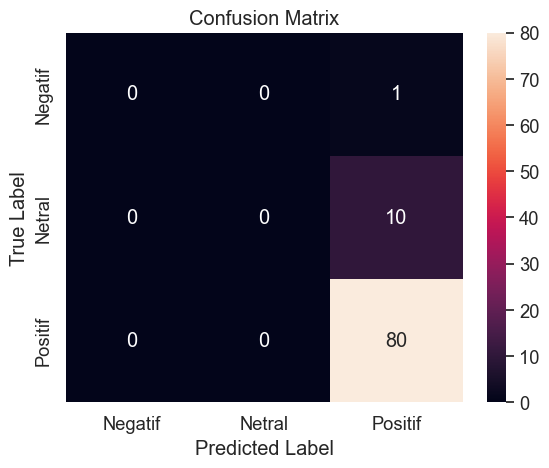

In [17]:
# Proses Pengujian
predictions_SVM_5050 = clf.predict(test_X_tfidf_5050)

#simpan data frame
test_prediction_5050 = pd.DataFrame()
test_prediction_5050['Text'] = test_X
test_prediction_5050['Label'] = predictions_SVM_5050

test_prediction_5050.to_csv('instagramcom-post_prediction_5050.csv')

from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["Negatif","Netral","Positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_5050), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions_SVM_5050))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_5050))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_5050, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_5050, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_5050, average='macro'))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         1
      Netral       0.00      0.00      0.00        10
     Positif       0.88      1.00      0.94        80

    accuracy                           0.88        91
   macro avg       0.29      0.33      0.31        91
weighted avg       0.77      0.88      0.82        91

Accuracy of the model :  0.8791208791208791
Precision of the model:  0.29304029304029305
Recall of the model:  0.3333333333333333
F1-score of the model:  0.31189083820662766


c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [19]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_X_tfidf_5050,train_Y)
predictions= clf.predict(test_X_tfidf_5050)

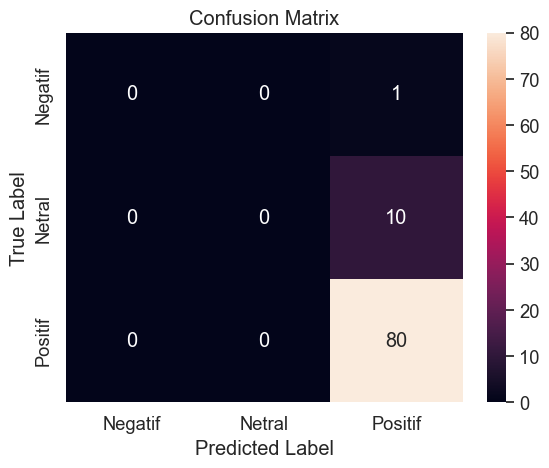

In [20]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["Negatif","Netral","Positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [21]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report


print (classification_report(test_Y, predictions))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions))
print('Precision of the model: ', precision_score(test_Y, predictions, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions, average='macro'))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         1
      Netral       0.00      0.00      0.00        10
     Positif       0.88      1.00      0.94        80

    accuracy                           0.88        91
   macro avg       0.29      0.33      0.31        91
weighted avg       0.77      0.88      0.82        91

Accuracy of the model :  0.8791208791208791
Precision of the model:  0.29304029304029305
Recall of the model:  0.3333333333333333
F1-score of the model:  0.31189083820662766


c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c